### Importação dos dados



In [29]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja_1 = pd.read_csv(url)
loja_2 = pd.read_csv(url2)
loja_3 = pd.read_csv(url3)
loja_4 = pd.read_csv(url4)

loja_1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
!pip install squarify
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#concatenando as lojas e criando um identificador

loja_1['loja'] = 'loja_1'
loja_2['loja'] = 'loja_2'
loja_3['loja'] = 'loja_3'
loja_4['loja'] = 'loja_4'

lojas = pd.concat([loja_1, loja_2, loja_3, loja_4], ignore_index=True)

lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja_1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja_1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja_1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja_1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja_1


#1. Análise do faturamento


In [32]:
df_faturamento = lojas.groupby('loja')['Preço'].sum()
df_faturamento_reais = df_faturamento.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
df_faturamento_reais

,Preço
loja,
loja_1,"R$ 1.534.509,12"
loja_2,"R$ 1.488.459,06"
loja_3,"R$ 1.464.025,03"
loja_4,"R$ 1.384.497,58"


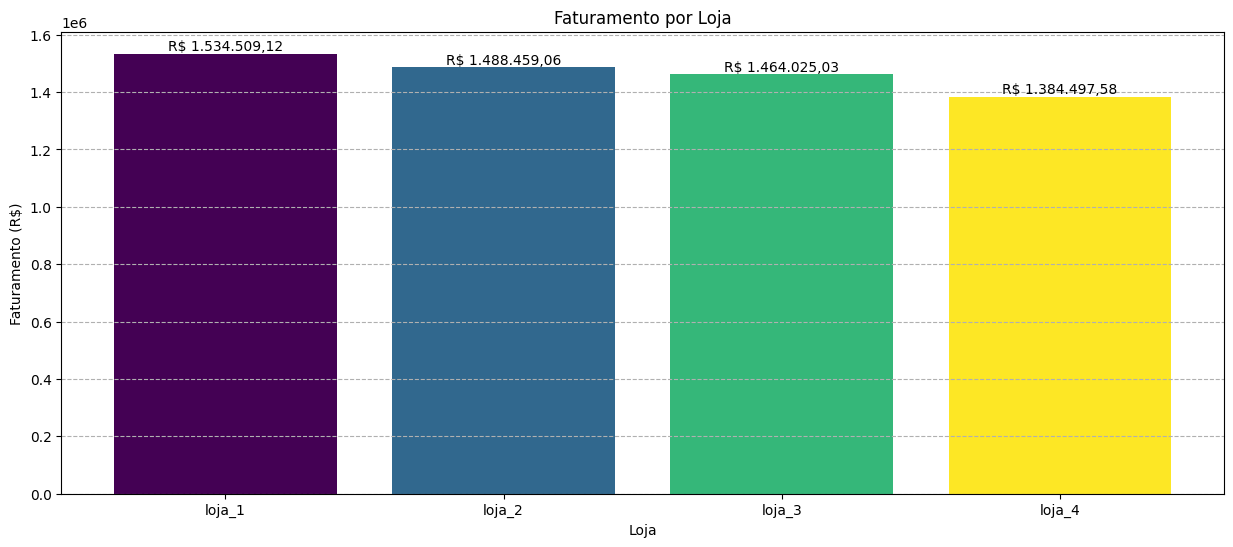

In [33]:
#gráfico de faturamento
df_faturamento_sorted = df_faturamento.sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_faturamento_sorted)))

plt.figure(figsize=(15, 6))
bars = plt.bar(df_faturamento_sorted.index, df_faturamento_sorted.values, color=colors)
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R$ {yval:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), va='bottom', ha='center')

plt.show()


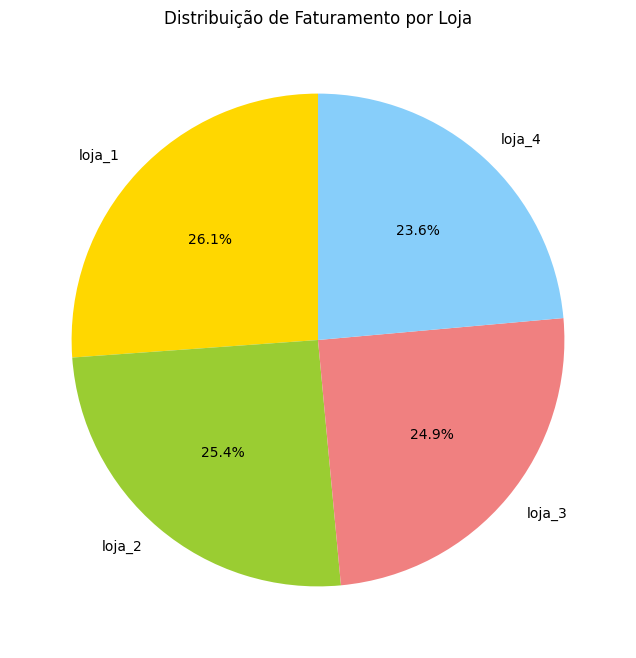

In [61]:
#gráfico de pizza de distribuição de faturamento por loja
plt.figure(figsize=(8, 8))
plt.pie(df_faturamento, labels=df_faturamento.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribuição de Faturamento por Loja')
plt.show()

# 2. Vendas por Categoria


In [34]:
df_vendas_categoria = lojas.groupby('Categoria do Produto')['Preço'].sum()
df_vendas_categoria_reais = df_vendas_categoria.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
df_vendas_categoria_reais

,Preço
Categoria do Produto,
brinquedos,"R$ 98.140,86"
eletrodomesticos,"R$ 1.766.337,03"
eletronicos,"R$ 2.214.099,72"
esporte e lazer,"R$ 190.635,39"
instrumentos musicais,"R$ 465.029,67"
livros,"R$ 50.260,74"
moveis,"R$ 1.010.214,00"
utilidades domesticas,"R$ 76.773,38"


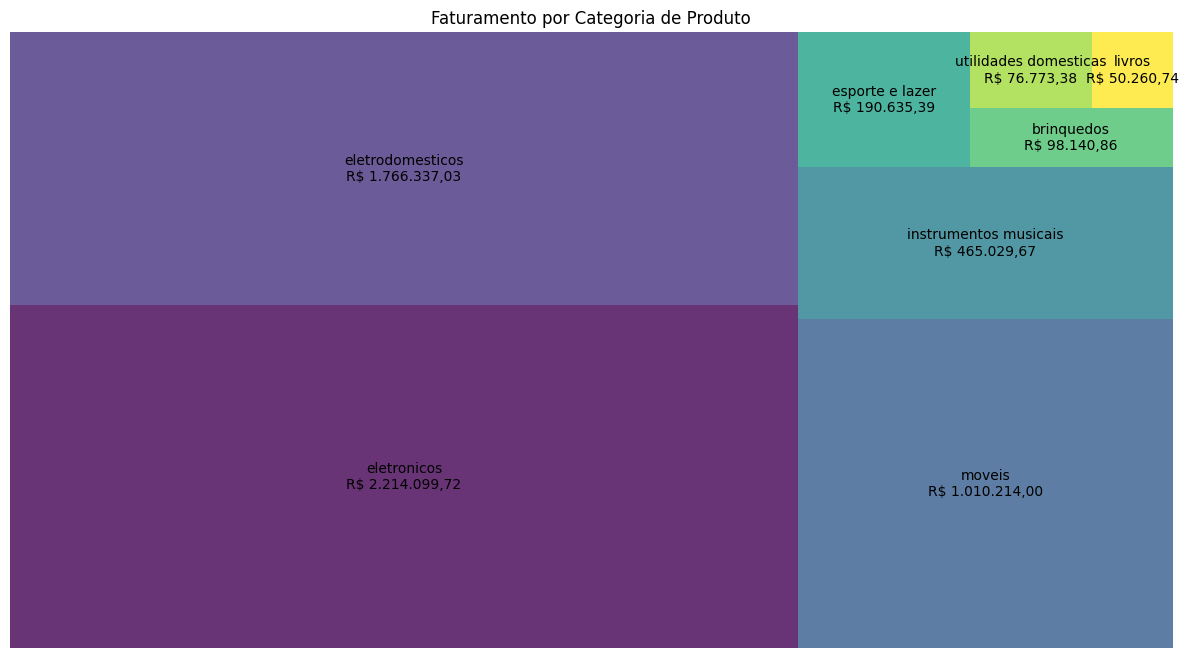

In [73]:
# treemap por categoria
import squarify
import matplotlib.pyplot as plt

df_vendas_categoria_sorted = df_vendas_categoria.sort_values(ascending=False)
sizes = df_vendas_categoria_sorted.values
labels = [f'{cat}\nR$ {val:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for cat, val in df_vendas_categoria_sorted.items()]
colors = plt.cm.viridis(np.linspace(0, 1, len(sizes)))

plt.figure(figsize=(15, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Faturamento por Categoria de Produto')
plt.axis('off')
plt.show()


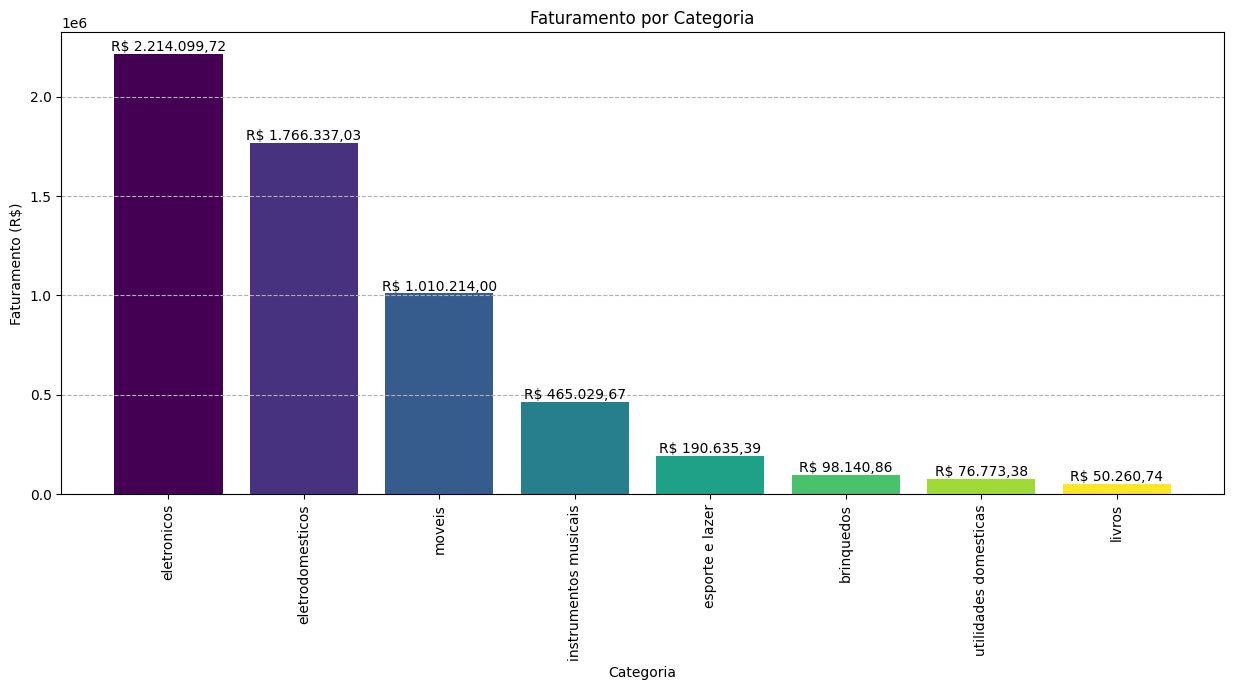

In [66]:
#gráfico de vendas por categoria
df_vendas_categoria_sorted = df_vendas_categoria.sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_vendas_categoria_sorted)))

plt.figure(figsize=(15, 6))
bars = plt.bar(df_vendas_categoria_sorted.index, df_vendas_categoria_sorted.values, color=colors)
plt.title('Faturamento por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R$ {yval:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), va='bottom', ha='center')

plt.show()

# 3. Média de Avaliação das Lojas

In [36]:
df_avaliacao = lojas.groupby('loja')['Avaliação da compra'].mean()
df_avaliacao

,Avaliação da compra
loja,
loja_1,3.976685
loja_2,4.037304
loja_3,4.048326
loja_4,3.995759


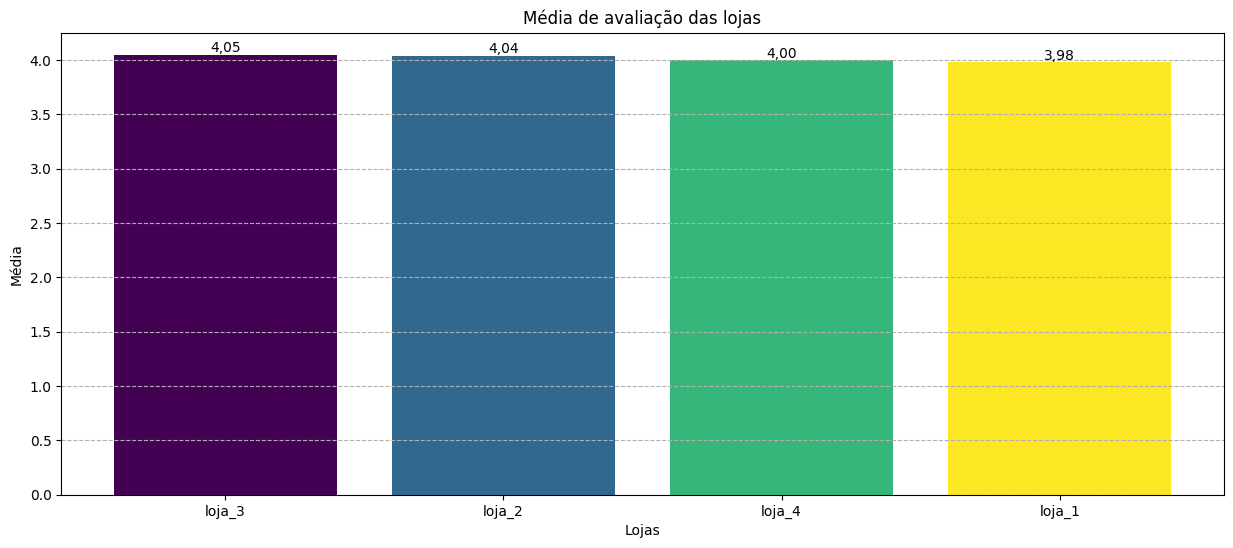

In [55]:
#gráfico da média de avaliação
df_avaliacao_sorted = df_avaliacao.sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_avaliacao_sorted)))
plt.figure(figsize=(15, 6))
bars = plt.bar(df_avaliacao_sorted.index, df_avaliacao_sorted.values, color=colors)
plt.title('Média de avaliação das lojas')
plt.xlabel('Lojas')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), va='bottom', ha='center')
plt.show()

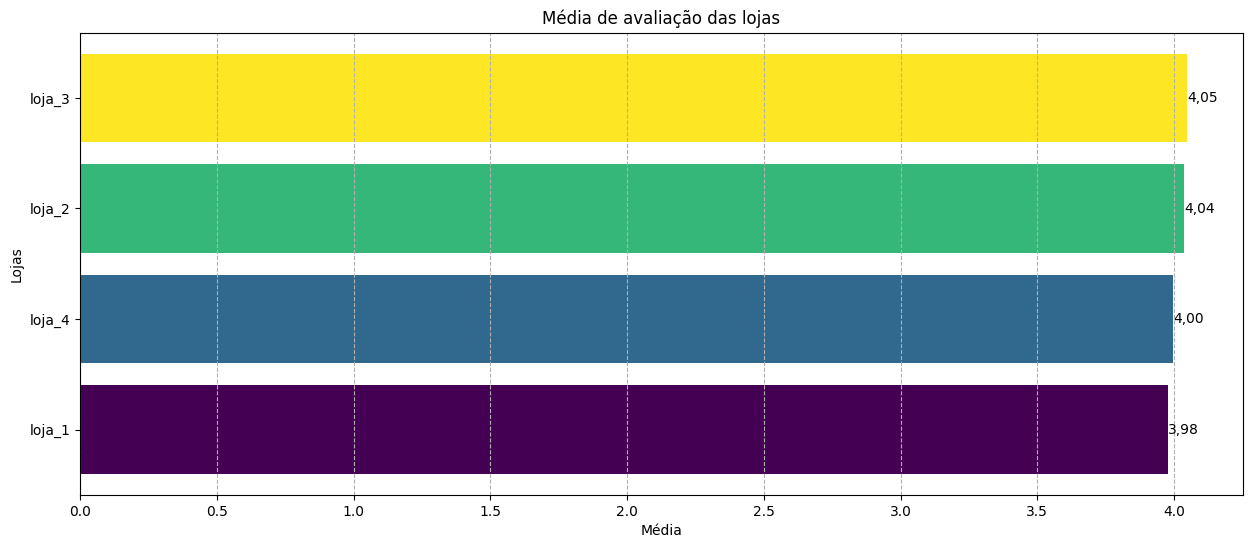

In [77]:
#  gráfico da média de avaliação (horizontal)
df_avaliacao_sorted = df_avaliacao.sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_avaliacao_sorted)))

plt.figure(figsize=(15, 6))
bars = plt.barh(df_avaliacao_sorted.index, df_avaliacao_sorted.values, color=colors)
plt.title('Média de avaliação das lojas')
plt.xlabel('Média')
plt.ylabel('Lojas')
plt.grid(axis='x', linestyle='--')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), va='center', ha='left')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [38]:
df_produtos_mais_vendidos = lojas.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
top_5_mais_vendidos = df_produtos_mais_vendidos.nlargest(5)
top_5_mais_vendidos_reais = top_5_mais_vendidos.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
top_5_mais_vendidos_reais

,Preço
Produto,
TV Led UHD 4K,"R$ 576.652,70"
Celular Plus X42,"R$ 534.735,14"
Geladeira,"R$ 513.249,34"
Smart TV,"R$ 386.963,12"
Lavadora de roupas,"R$ 323.292,37"


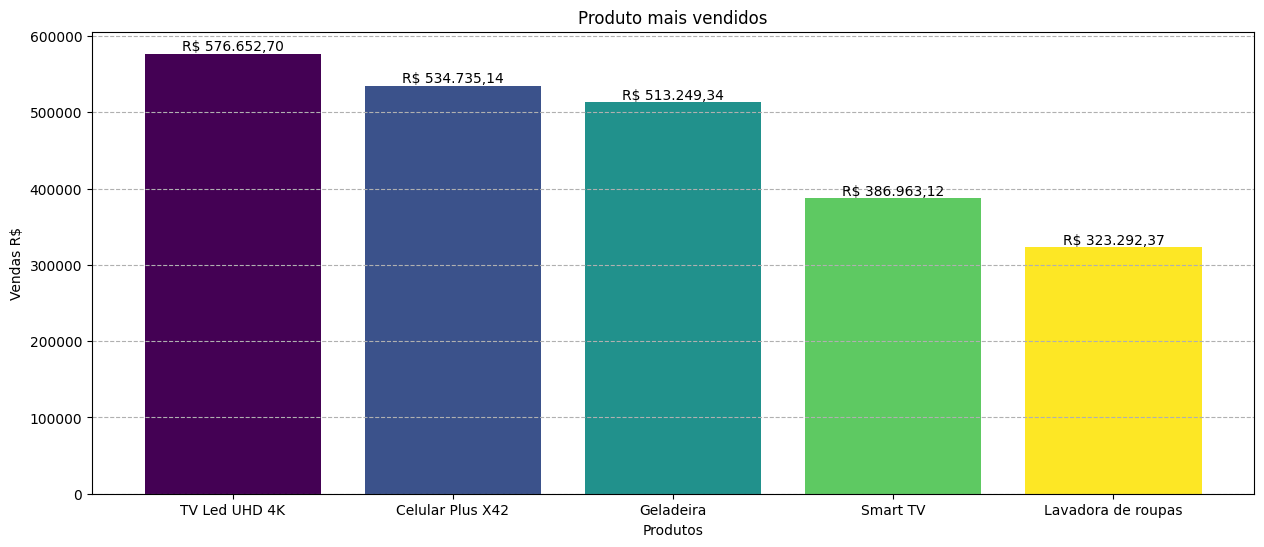

In [39]:
#gráfico da maiores vendas
top_5_mais_vendidos_sorted = top_5_mais_vendidos.sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_5_mais_vendidos_sorted)))

plt.figure(figsize=(15, 6))
bars = plt.bar(top_5_mais_vendidos_sorted.index, top_5_mais_vendidos_sorted.values, color=colors)
plt.title('Produto mais vendidos')
plt.xlabel('Produtos')
plt.ylabel('Vendas R$')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R$ {yval:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), va='bottom', ha='center')

plt.show()

In [40]:
df_produtos_menos_vendidos = lojas.groupby('Produto')['Preço'].sum().sort_values(ascending=True)
top_5_menos_vendidos = df_produtos_menos_vendidos.nsmallest(5)
top_5_menos_vendidos_reais = top_5_menos_vendidos.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
top_5_menos_vendidos_reais

,Preço
Produto,
Cubo mágico 8x8,"R$ 3.638,68"
Corda de pular,"R$ 4.090,93"
Dinossauro Rex,"R$ 4.150,53"
Xadrez de madeira,"R$ 6.865,90"
Jogo de copos,"R$ 7.445,28"


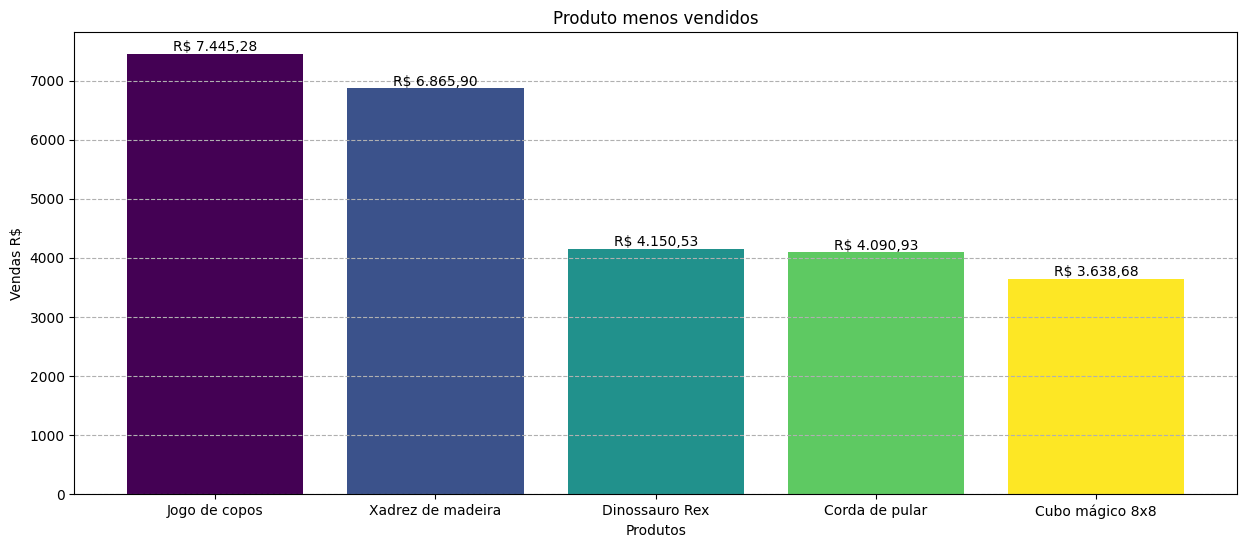

In [41]:
#gráfico da menores vendas
top_5_menos_vendidos_sorted = top_5_menos_vendidos.sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_5_menos_vendidos_sorted)))

plt.figure(figsize=(15, 6))
bars = plt.bar(top_5_menos_vendidos_sorted.index, top_5_menos_vendidos_sorted.values, color=colors)
plt.title('Produto menos vendidos')
plt.xlabel('Produtos')
plt.ylabel('Vendas R$')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R$ {yval:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), va='bottom', ha='center')

plt.show()

In [42]:
df_produtos_mais_vendidos_por_loja = lojas.groupby('loja').apply(lambda x: x.groupby('Produto')['Preço'].sum().nlargest(5)).reset_index()
df_produtos_mais_vendidos_por_loja.columns = ['Loja', 'Produto', 'Preço']
df_produtos_mais_vendidos_por_loja['Preço formatado'] = df_produtos_mais_vendidos_por_loja['Preço'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
display(df_produtos_mais_vendidos_por_loja[['Loja', 'Produto', 'Preço formatado']])

/tmp/ipython-input-42-573902058.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_produtos_mais_vendidos_por_loja = lojas.groupby('loja').apply(lambda x: x.groupby('Produto')['Preço'].sum().nlargest(5)).reset_index()


,Loja,Produto,Preço formatado
0,loja_1,TV Led UHD 4K,"R$ 189.534,28"
1,loja_1,Geladeira,"R$ 149.524,28"
2,loja_1,Celular Plus X42,"R$ 130.536,40"
3,loja_1,Smart TV,"R$ 89.936,15"
4,loja_1,Lavadora de roupas,"R$ 87.711,30"
5,loja_2,Celular Plus X42,"R$ 150.967,83"
6,loja_2,TV Led UHD 4K,"R$ 137.833,06"
7,loja_2,Geladeira,"R$ 130.176,48"
8,loja_2,Lavadora de roupas,"R$ 89.016,81"
9,loja_2,Smart TV,"R$ 81.522,94"


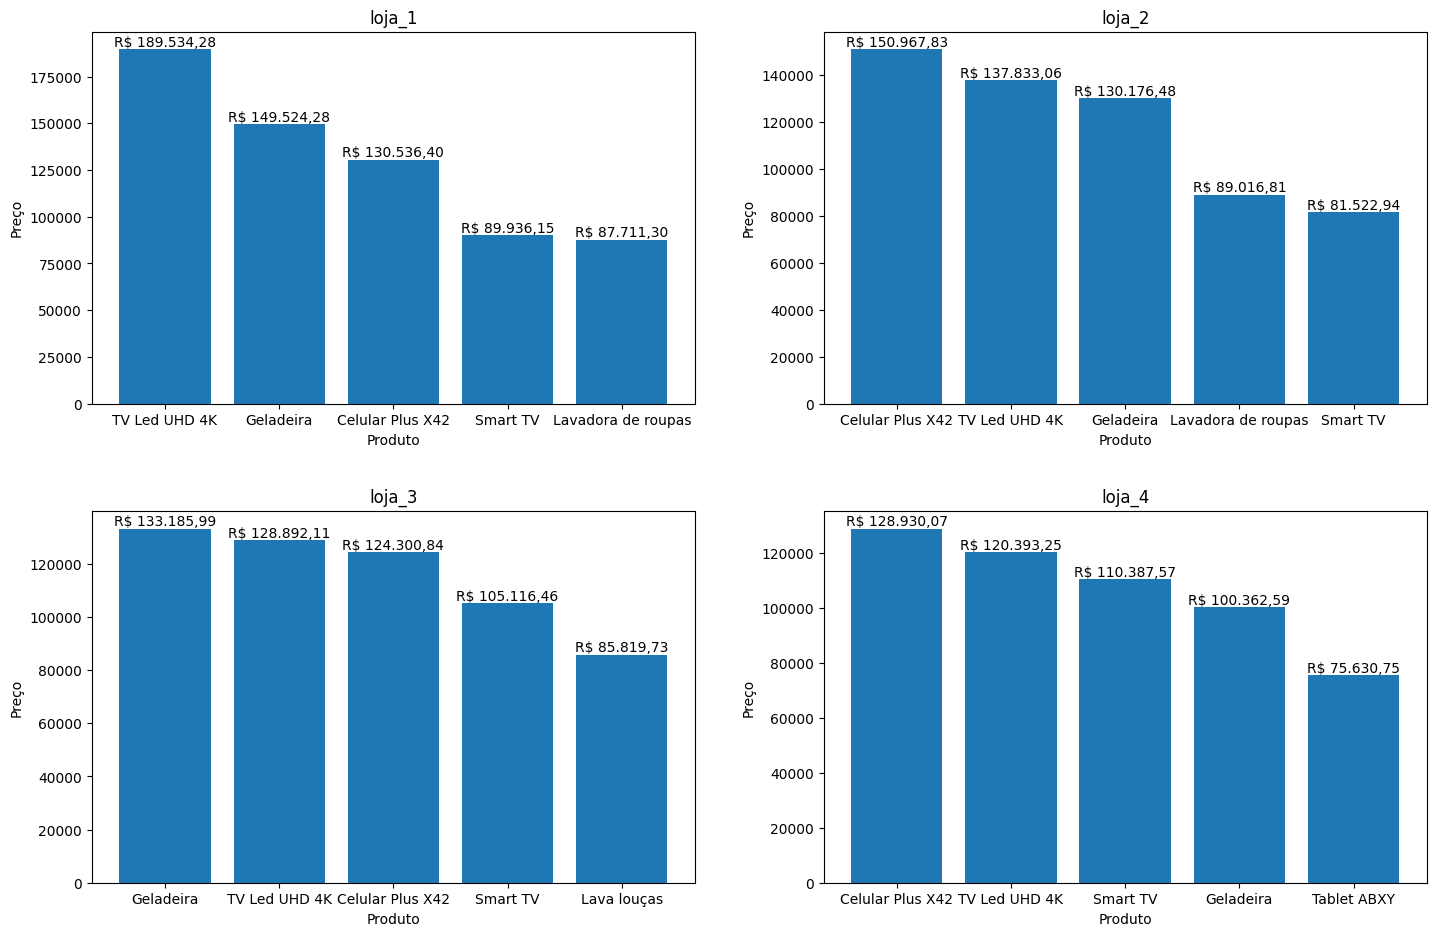

In [45]:
#Gráfico mais vendido barra
fig, axs = plt.subplots(2, 2, figsize=(15,10))

gf_mais_vendidos = df_produtos_mais_vendidos_por_loja['Loja'].unique()
for i, loja in enumerate(gf_mais_vendidos):
    df_loja = df_produtos_mais_vendidos_por_loja[df_produtos_mais_vendidos_por_loja['Loja'] == loja]
    bars = axs[i//2, i%2].bar(df_loja['Produto'], df_loja['Preço'])

    for bar in bars:
        yval = bar.get_height()
        axs[i//2, i%2].text(bar.get_x() + bar.get_width()/2, yval, df_produtos_mais_vendidos_por_loja.loc[(df_produtos_mais_vendidos_por_loja['Loja'] == loja)
         & (df_produtos_mais_vendidos_por_loja['Produto'] == df_loja['Produto'].iloc[bars.index(bar)]), 'Preço formatado'].iloc[0], va='bottom', ha='center', rotation=0)

    axs[i//2, i%2].set_title(loja)
    axs[i//2, i%2].set_xlabel('Produto')
    axs[i//2, i%2].set_ylabel('Preço')
    axs[i//2, i%2].tick_params(axis='x', rotation=0)

plt.tight_layout(pad=3)
plt.show()

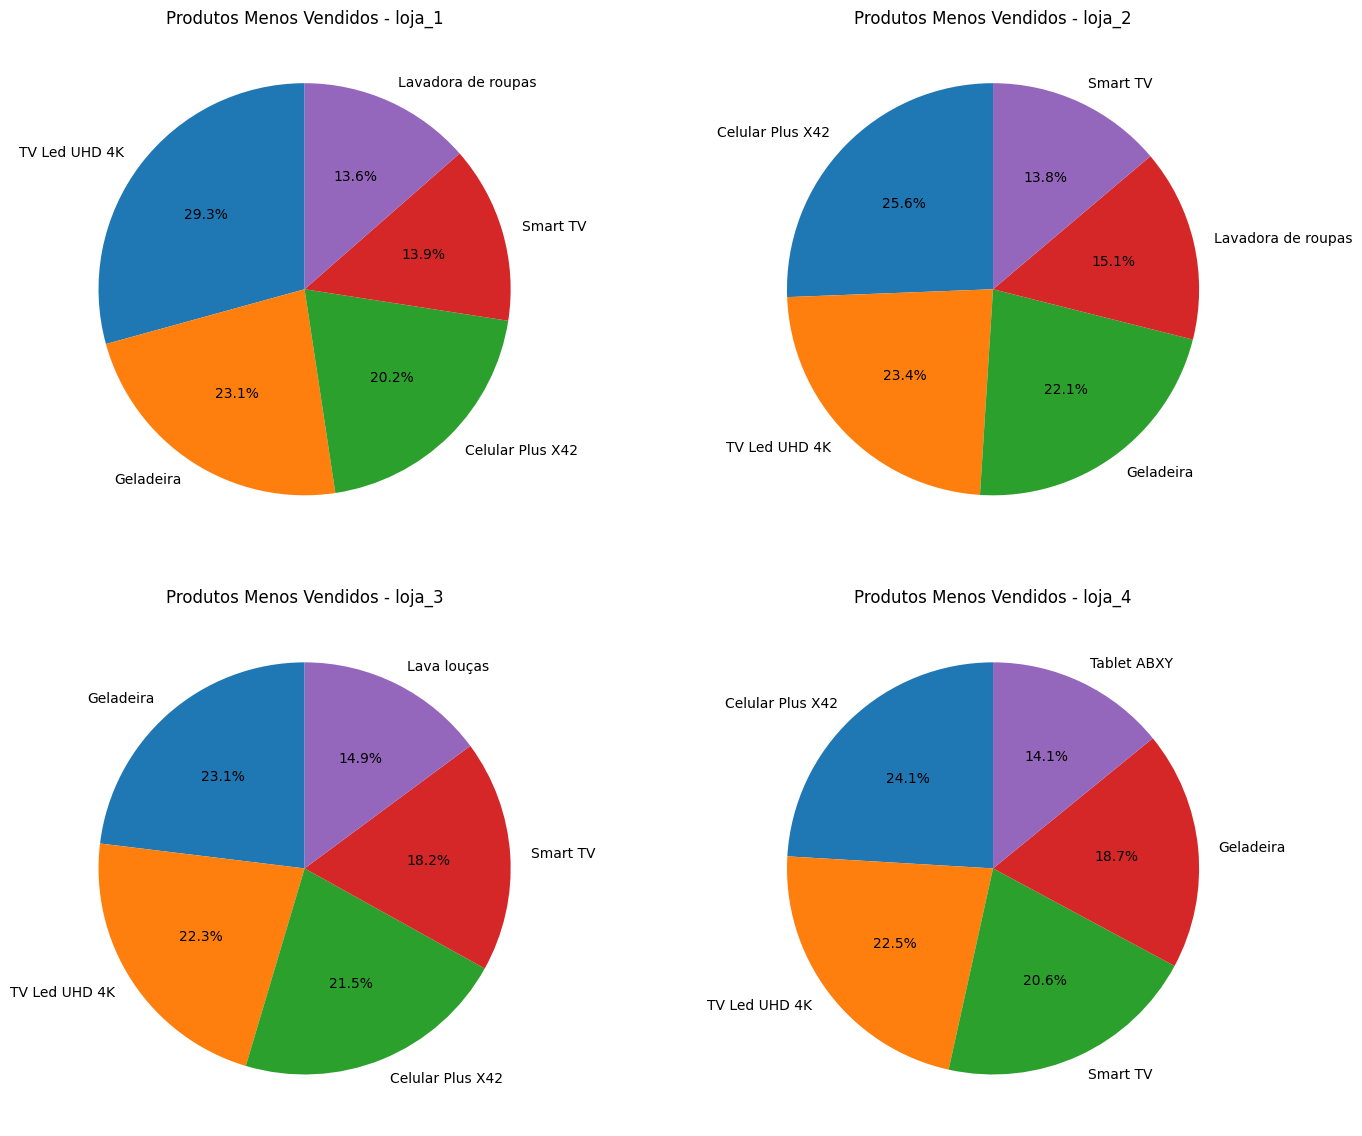

In [82]:
# Usando gráfico de pizza para visualizar a proporção dos produtos mais vendidos por loja
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

gf_menos_vendidos = df_produtos_mais_vendidos_por_loja['Loja'].unique()
for i, loja in enumerate(gf_menos_vendidos):
    df_loja = df_produtos_mais_vendidos_por_loja[df_produtos_mais_vendidos_por_loja['Loja'] == loja]
    axs[i//2, i%2].pie(df_loja['Preço'], labels=df_loja['Produto'], autopct='%1.1f%%', startangle=90)
    axs[i//2, i%2].set_title(f'Produtos Menos Vendidos - {loja}')

plt.tight_layout(pad=3)
plt.show()

In [47]:
df_produtos_menos_vendas_por_loja = lojas.groupby('loja').apply(lambda x: x.groupby('Produto')['Preço'].sum().nsmallest(5)).reset_index()
df_produtos_menos_vendas_por_loja.columns = ['Loja', 'Produto', 'Preço']
df_produtos_menos_vendas_por_loja['Preço formatado'] = df_produtos_menos_vendas_por_loja['Preço'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
display(df_produtos_menos_vendas_por_loja[['Loja', 'Produto', 'Preço formatado']])

/tmp/ipython-input-47-2015003328.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_produtos_menos_vendas_por_loja = lojas.groupby('loja').apply(lambda x: x.groupby('Produto')['Preço'].sum().nsmallest(5)).reset_index()


,Loja,Produto,Preço formatado
0,loja_1,Corda de pular,"R$ 870,89"
1,loja_1,Dinossauro Rex,"R$ 918,40"
2,loja_1,Cubo mágico 8x8,"R$ 929,27"
3,loja_1,Jogo de copos,"R$ 1.812,15"
4,loja_1,Xadrez de madeira,"R$ 1.907,42"
5,loja_2,Cubo mágico 8x8,"R$ 858,22"
6,loja_2,Dinossauro Rex,"R$ 1.027,41"
7,loja_2,Corda de pular,"R$ 1.142,54"
8,loja_2,Xadrez de madeira,"R$ 1.717,05"
9,loja_2,Jogo de copos,"R$ 2.056,69"


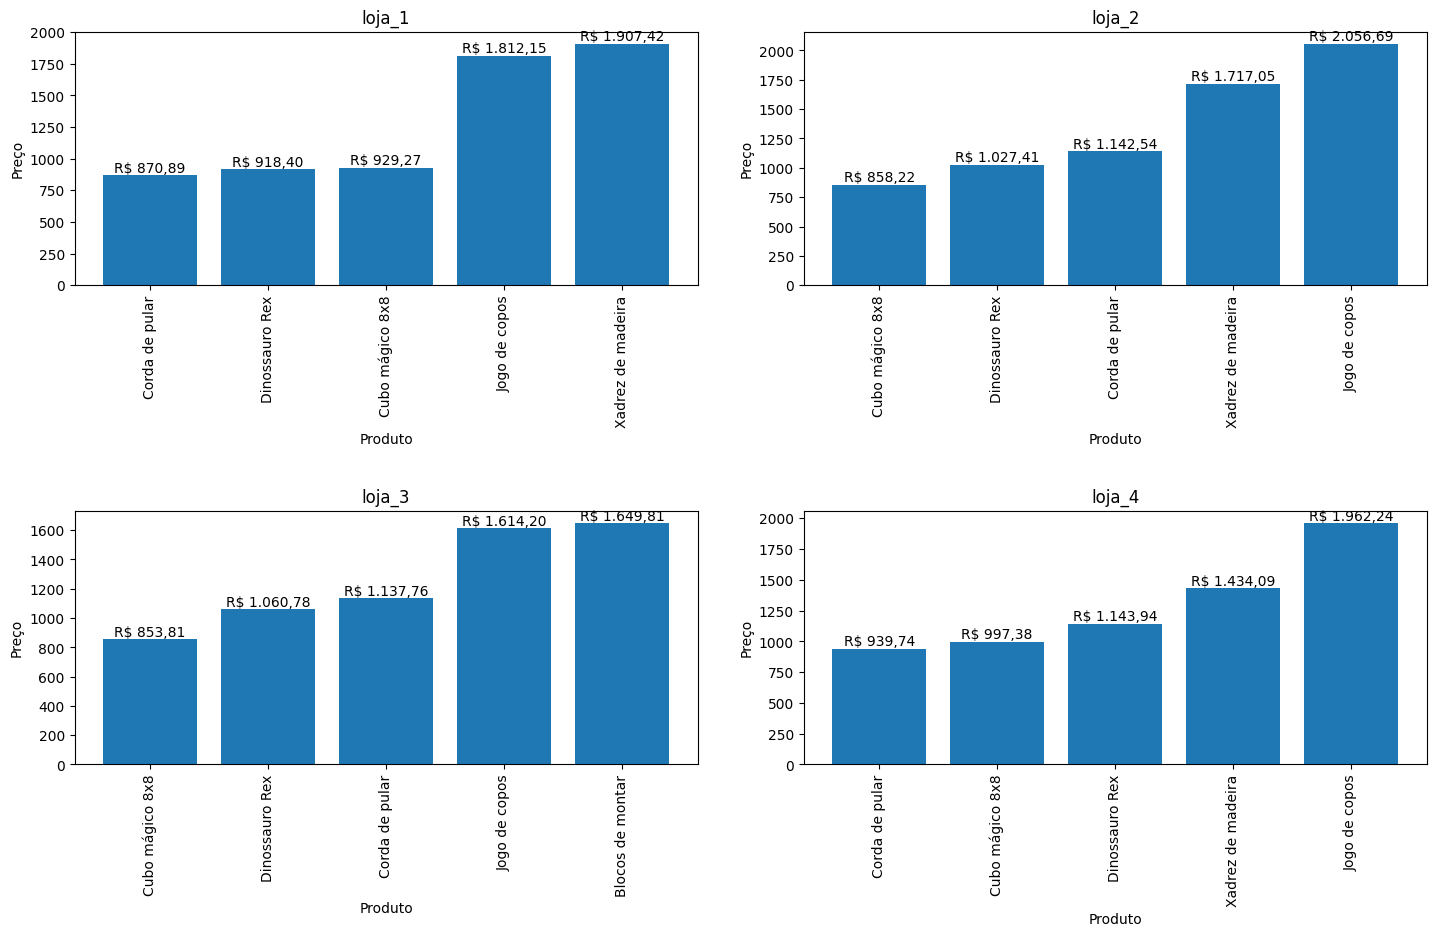

In [48]:
#Gráfico menos vendido barra
fig, axs = plt.subplots(2, 2, figsize=(15,10))

gf_menos_vendidos = df_produtos_menos_vendas_por_loja['Loja'].unique()
for i, loja in enumerate(gf_menos_vendidos):
    df_loja = df_produtos_menos_vendas_por_loja[df_produtos_menos_vendas_por_loja['Loja'] == loja]
    bars = axs[i//2, i%2].bar(df_loja['Produto'], df_loja['Preço'])

    for bar in bars:
        yval = bar.get_height()
        axs[i//2, i%2].text(bar.get_x() + bar.get_width()/2, yval, df_produtos_menos_vendas_por_loja.loc[(df_produtos_menos_vendas_por_loja['Loja'] == loja)
         & (df_produtos_menos_vendas_por_loja['Produto'] == df_loja['Produto'].iloc[bars.index(bar)]), 'Preço formatado'].iloc[0], va='bottom', ha='center', rotation=0)

    axs[i//2, i%2].set_title(loja)
    axs[i//2, i%2].set_xlabel('Produto')
    axs[i//2, i%2].set_ylabel('Preço')
    axs[i//2, i%2].tick_params(axis='x', rotation=90)

plt.tight_layout(pad=3)
plt.show()

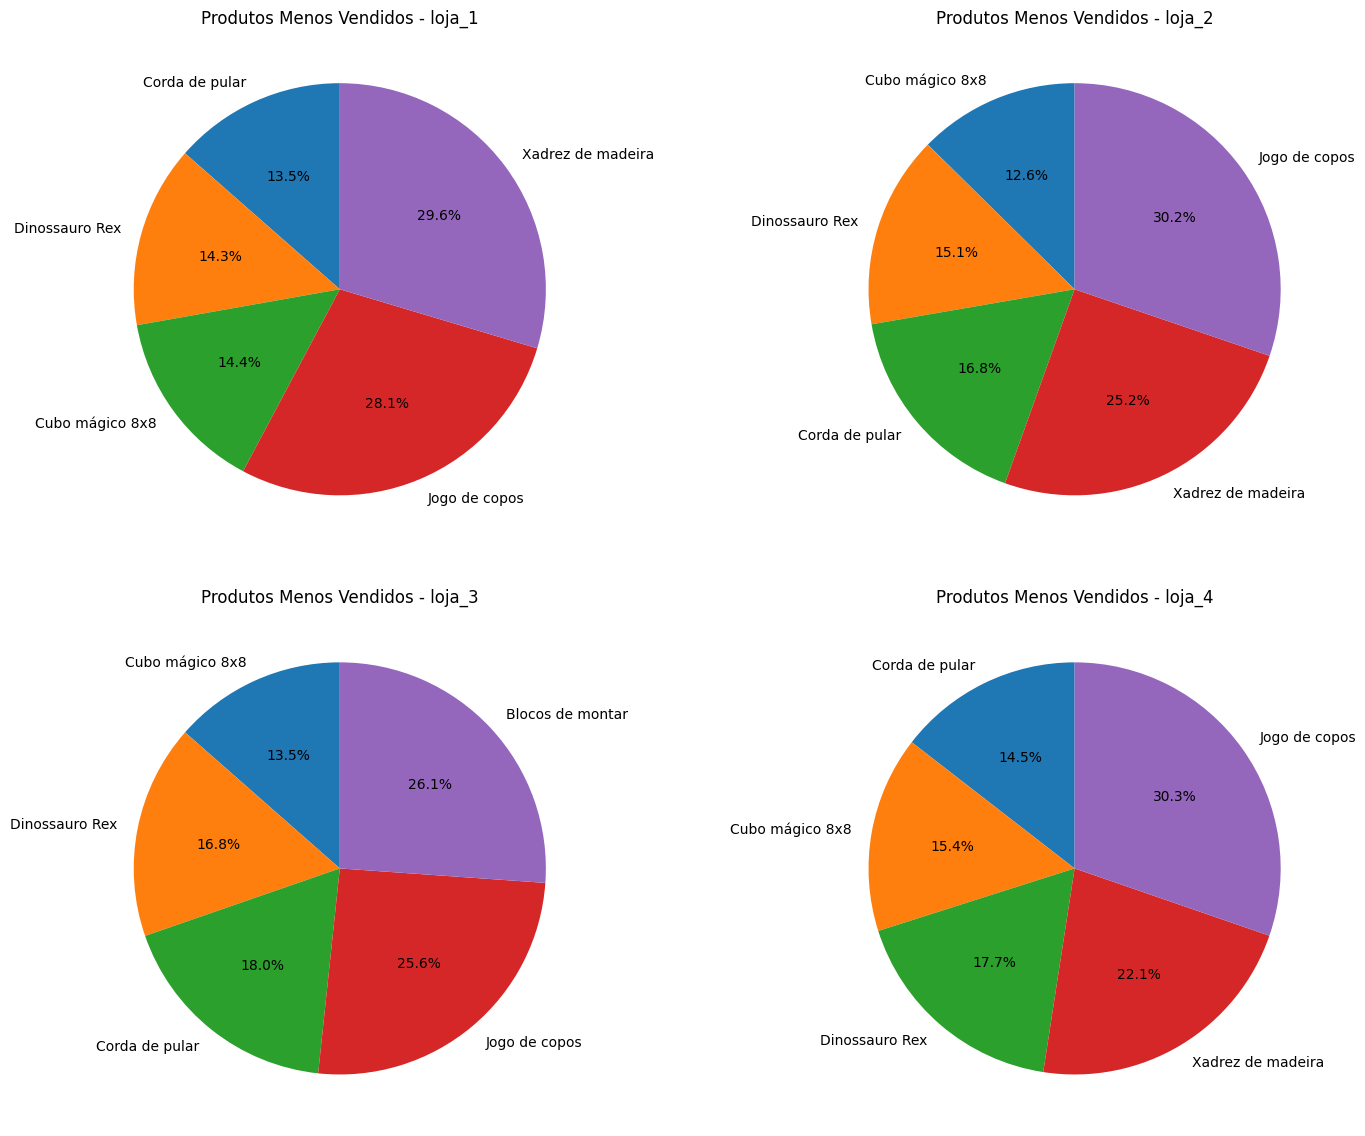

In [81]:
# Usando gráfico de pizza para visualizar a proporção dos produtos menos vendidos por loja
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

gf_menos_vendidos = df_produtos_menos_vendas_por_loja['Loja'].unique()
for i, loja in enumerate(gf_menos_vendidos):
    df_loja = df_produtos_menos_vendas_por_loja[df_produtos_menos_vendas_por_loja['Loja'] == loja]
    axs[i//2, i%2].pie(df_loja['Preço'], labels=df_loja['Produto'], autopct='%1.1f%%', startangle=90)
    axs[i//2, i%2].set_title(f'Produtos Menos Vendidos - {loja}')

plt.tight_layout(pad=3)
plt.show()

# 5. Frete Médio por Loja


In [49]:
lojas.head(3)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja_1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja_1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja_1


In [50]:
df_frete = lojas.groupby('loja')['Frete'].mean()
df_frete

,Frete
loja,
loja_1,34.691805
loja_2,33.621941
loja_3,33.074464
loja_4,31.278997


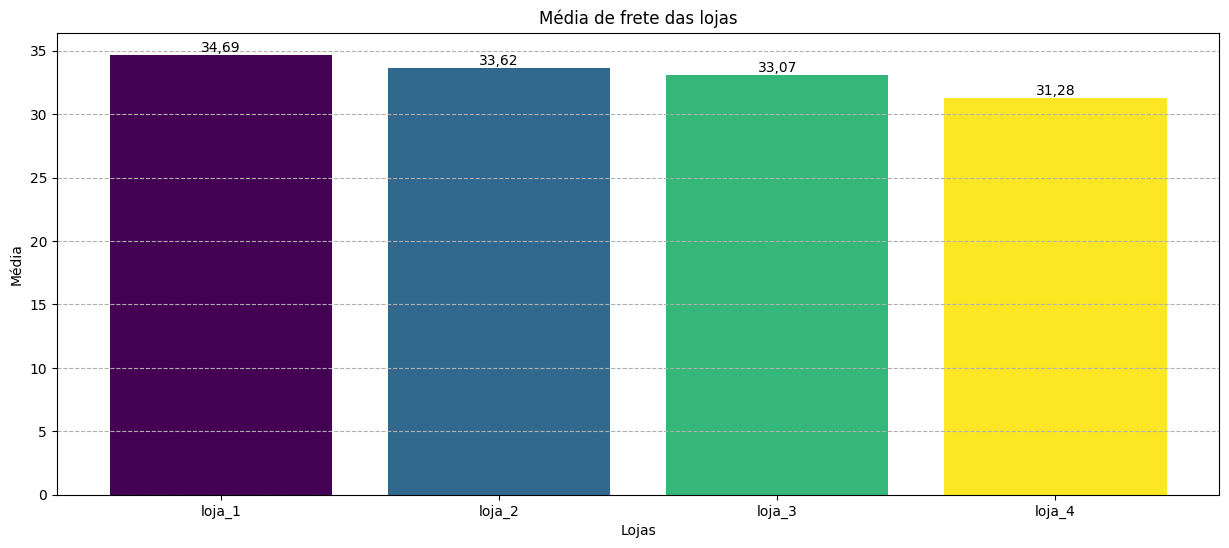

In [57]:
#gráfico da média de frete
df_frete_sorted = df_frete.sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_frete_sorted)))

plt.figure(figsize=(15, 6))
bars = plt.bar(df_frete_sorted.index, df_frete_sorted.values, color=colors)
plt.title('Média de frete das lojas')
plt.xlabel('Lojas')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), va='bottom', ha='center')

plt.show()


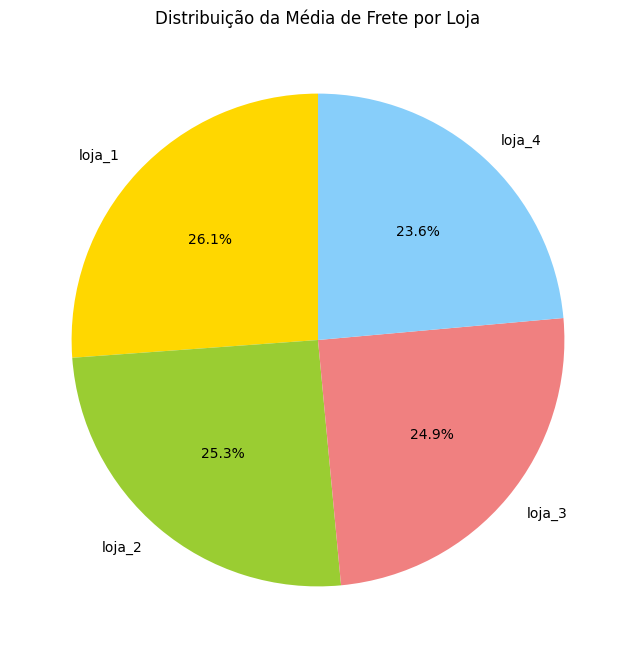

In [78]:

#gráfico de pizza da média de frete
plt.figure(figsize=(8, 8))
plt.pie(df_frete, labels=df_frete.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribuição da Média de Frete por Loja')
plt.show()

# Análise de resultado

* Faturamento: A
  * loja_4 apresentou o menor faturamento total em comparação com as outras lojas.
* Média de Avaliação:
  * A loja_4 teve a segunda menor média de avaliação entre as lojas.
* Frete Médio:
  * Embora a loja_4 tenha o menor frete médio, o faturamento e a avaliação sugerem que este fator não compensa o desempenho inferior em outras áreas.
* Produtos Mais Vendidos por Loja:
  * A loja_4 tem uma lista dos top 5 produtos mais vendidos que se assemelha às outras lojas, mas os valores de faturamento para esses produtos são consistentemente mais baixos em comparação com as top vendas das outras lojas.
* Produtos Menos Vendidos por Loja:
  * A loja_4, assim como as outras lojas, tem produtos com baixo faturamento, mas a presença de alguns produtos com valores muito baixos contribui para o menor faturamento geral.

Considerando o faturamento mais baixo e a segunda menor média de avaliação, a loja_4 demonstra ser a menos competitiva no geral.
Portanto a venda da loja 4 é a mais indicada para o Sr. João!